# Overshadowing Attacks

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
palette = 'colorblind'

sns.set_theme(palette=palette, color_codes=True)
sns.set_style('ticks')
sns.set_context('notebook')
sns.color_palette(palette)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

In [48]:
with open("data/overshadowing", 'r') as f:
    output = f.readlines()
    output = [ int(o) for o in output ]

with open("data/overshadowing_files", 'r') as f:
    output_files = f.readlines()
    output_files = [ [ int(a) for a in o.split("/")[-1][:-5].split("_")[1:] ] for o in output_files ]

data = [ output_files[i] + [output[i]] for i in range(len(output)) ]

In [49]:
df = pd.DataFrame(data, columns=["channel_noise_victim", "channel_noise_attacker", "overshadow_strength", "accuracy"])
df.overshadow_strength = df.overshadow_strength / 10
df.accuracy = df.accuracy / 1024
df.channel_noise_victim = df.channel_noise_victim == 1
df.channel_noise_attacker = df.channel_noise_attacker == 1
df

,channel_noise_victim,channel_noise_attacker,overshadow_strength,accuracy
0,True,True,3.9,1.000000
1,True,True,5.1,1.000000
2,False,False,7.4,1.000000
3,False,True,0.5,0.000000
4,False,True,1.7,0.886719
...,...,...,...,...
399,False,False,8.5,1.000000
400,True,True,4.7,1.000000
401,False,True,3.7,1.000000
402,True,False,2.8,0.486328


Text(0.5, 0, 'Relative Overshadowing Strength')

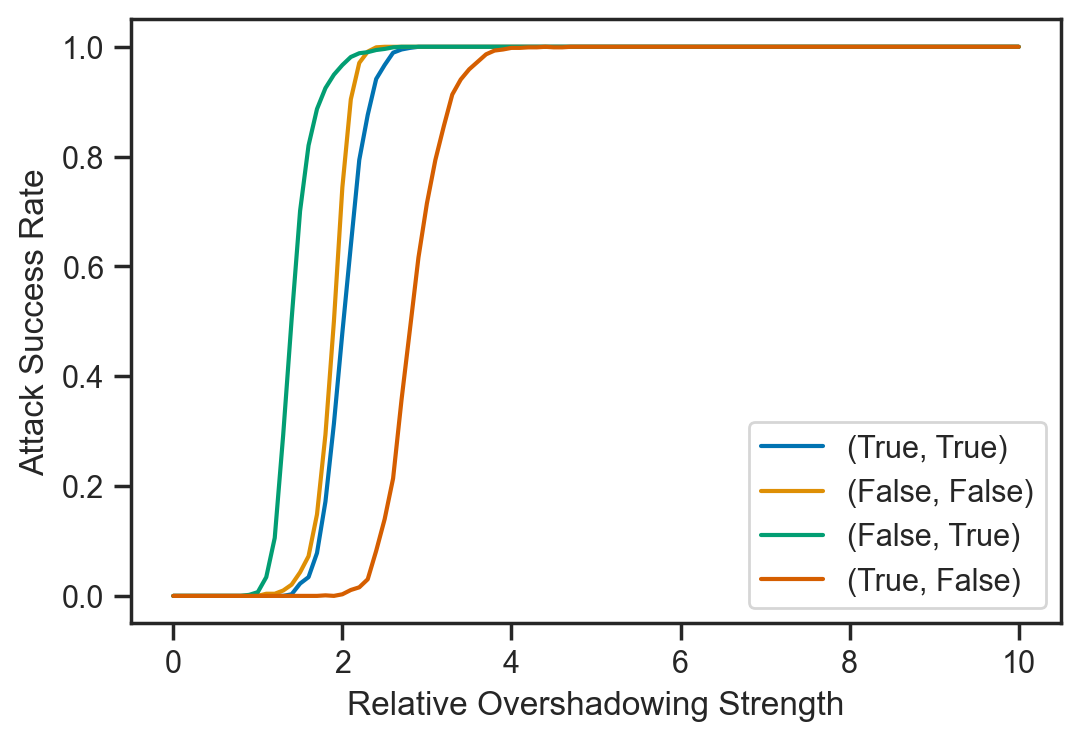

In [56]:
sns.lineplot(data=df, x='overshadow_strength', y='accuracy', hue=df[['channel_noise_victim', 'channel_noise_attacker']].apply(tuple, axis=1))

plt.ylabel("Attack Success Rate")
plt.xlabel("Relative Overshadowing Strength")

In [58]:
with open("data/overshadowing_noise1", 'r') as f:
    output = f.readlines()
    output = [ int(o) for o in output ]

with open("data/overshadowing_files_noise1", 'r') as f:
    output_files = f.readlines()
    output_files = [ [ float(a) for a in o.split("/")[-1][:-5].split("_")[1:] ] for o in output_files ]

data = [ output_files[i] + [output[i]] for i in range(len(output)) ]

df_noise1 = pd.DataFrame(data, columns=["noise_voltage", "overshadow_strength", "accuracy"])
df_noise1.overshadow_strength = df_noise1.overshadow_strength / 10
df_noise1.accuracy = df_noise1.accuracy / 1024
df_noise1

,noise_voltage,overshadow_strength,accuracy
0,0.00160,4.0,1.000000
1,0.00020,3.5,1.000000
2,0.00080,2.4,0.940430
3,0.00040,4.1,1.000000
4,0.00080,6.1,1.000000
...,...,...,...
702,0.00160,9.2,1.000000
703,0.00005,0.0,0.000000
704,0.00010,6.8,1.000000
705,0.00160,2.0,0.482422


In [59]:
with open("data/overshadowing_noise2", 'r') as f:
    output = f.readlines()
    output = [ int(o) for o in output ]

with open("data/overshadowing_files_noise2", 'r') as f:
    output_files = f.readlines()
    output_files = [ [ float(a) for a in o.split("/")[-1][:-5].split("_")[1:] ] for o in output_files ]

data = [ output_files[i] + [output[i]] for i in range(len(output)) ]

df_noise2 = pd.DataFrame(data, columns=["noise_voltage", "overshadow_strength", "accuracy"])
df_noise2.overshadow_strength = df_noise2.overshadow_strength / 10
df_noise2.accuracy = df_noise2.accuracy / 1024
df_noise2

,noise_voltage,overshadow_strength,accuracy
0,0.00002,4.0,1.000000
1,0.00091,5.0,1.000000
2,0.00046,3.0,1.000000
3,0.00042,2.0,0.481445
4,0.00058,2.0,0.474609
...,...,...,...
500,0.00020,2.0,0.481445
501,0.00092,2.0,0.477539
502,0.00082,3.0,1.000000
503,0.00085,5.0,1.000000


In [ ]:
sns.lineplot(data=df_noise1, x='overshadow_strength', y='accuracy', hue='noise_voltage')